<a href="https://colab.research.google.com/github/Ajayaditya-Codes/Exploratory-Data-Analysis-on-Telecomunication-Churn-Data/blob/main/Exploratory_Data_Analysis_on_Telecommunication_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Telecommunication Churn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#the data is clean
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df[['Age', 'Tenure', 'Balance', 'Exited']].corr()

,Age,Tenure,Balance,Exited
Age,1.000000,-0.009997,0.028308,0.285323
Tenure,-0.009997,1.000000,-0.012254,-0.014001
Balance,0.028308,-0.012254,1.000000,0.118533
Exited,0.285323,-0.014001,0.118533,1.000000


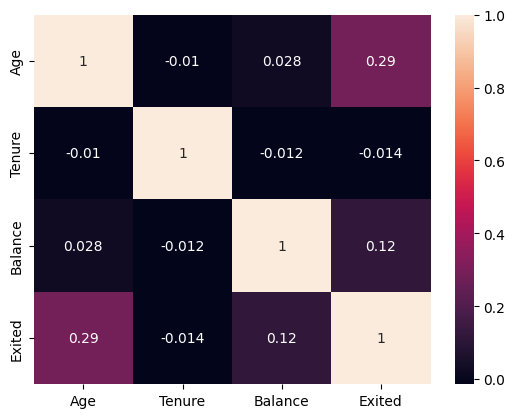

In [ ]:
sns.heatmap(df[['Age', 'Tenure', 'Balance', 'Exited']].corr(), annot=True)
plt.show()

In [ ]:
df[['Age', 'Tenure', 'Balance', 'Exited']].cov()

,Age,Tenure,Balance,Exited
Age,109.994084,-0.303229,1.852533e+04,1.205250
Tenure,-0.303229,8.364673,-2.211395e+03,-0.016309
Balance,18525.333354,-2211.394696,3.893436e+09,2978.931708
Exited,1.205250,-0.016309,2.978932e+03,0.162223


<Axes: >

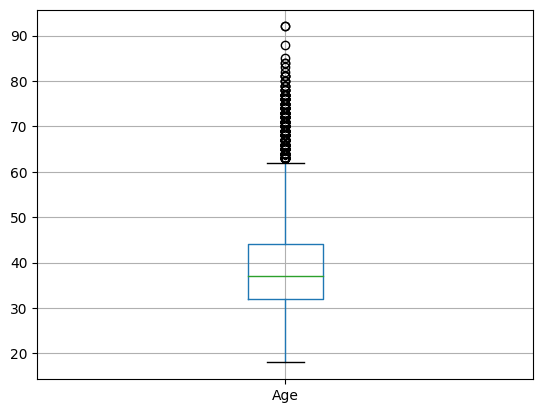

In [ ]:
df.boxplot(column='Age')

In [ ]:
newdf = df[['Exited', 'Gender', 'Geography', 'Tenure']].copy()
newdf['Age Binned'] = pd.cut(df['Age'], bins=10)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Exited      10000 non-null  int64   
 1   Gender      10000 non-null  object  
 2   Geography   10000 non-null  object  
 3   Tenure      10000 non-null  int64   
 4   Age Binned  10000 non-null  category
dtypes: category(1), int64(2), object(2)
memory usage: 322.8+ KB


0 Gender
1 Geography
2 Tenure
3 Age Binned


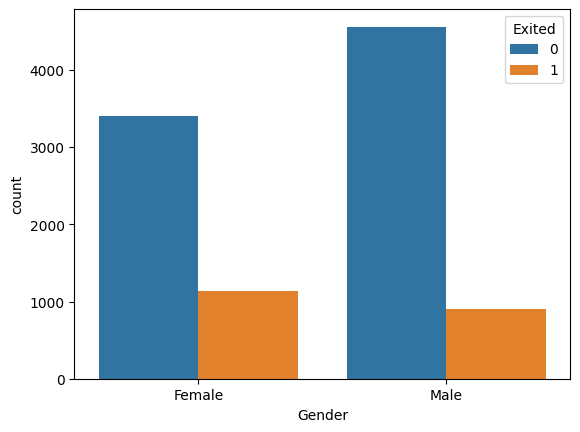

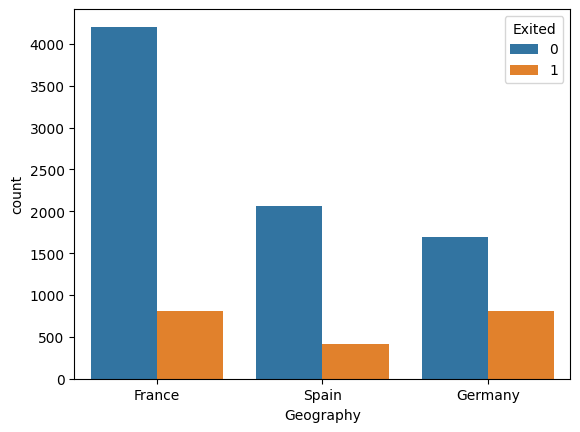

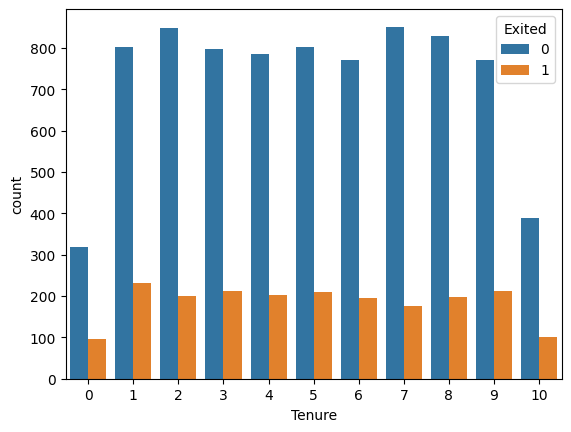

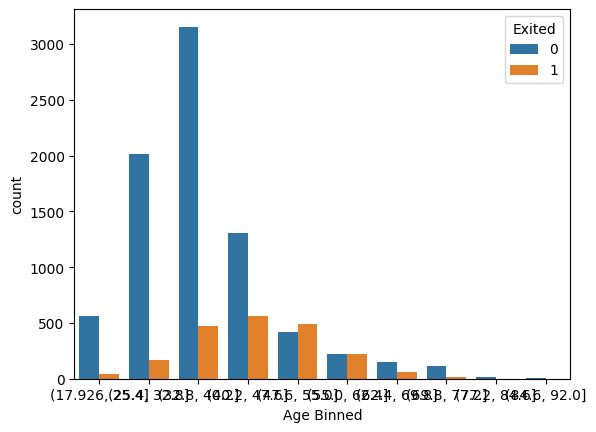

In [ ]:
for i, predictor in enumerate(newdf.drop(columns = ['Exited'])):
    print(i, predictor)
    plt.figure()
    sns.countplot(data=newdf, x=predictor, hue='Exited')

<Axes: xlabel='Age'>

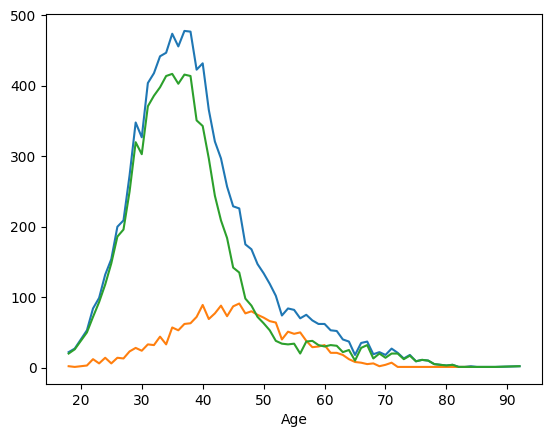

In [ ]:
df['Age'].value_counts().sort_index(ascending=True).plot()
newdf = df[df['Exited'] == 1]
newdf['Age'].value_counts().sort_index(ascending=True).plot()
newdf = df[df['Exited'] == 0]
newdf['Age'].value_counts().sort_index(ascending=True).plot()

Text(0.5, 1.0, 'Age by churn')

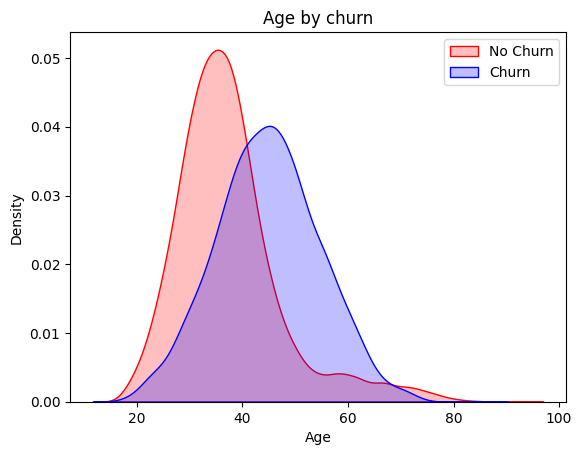

In [ ]:
t = sns.kdeplot(df[df["Exited"]==0]['Age'],
                  color="Red", fill=True)
graph = sns.kdeplot(df[df["Exited"]==1]['Age'],
                  color="Blue", fill=True)
graph.legend(["No Churn", "Churn"], loc='upper right')
graph.set_ylabel('Density')
graph.set_xlabel('Age')
graph.set_title('Age by churn')